CREATING MODELS THAT DETERMINE AMOUNT CONTRIBUTED TO WATER, WATER QUALITY AND QUANTITY

1. Importing Libraries that are required

In [350]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


2. Converting the data from csv files to python literate

In [308]:
df1 = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [309]:
df2 = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [310]:
df3 = pd.read_csv('SubmissionFormat.csv')
df3.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [311]:
df4 = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
df4.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


3. Merging datasets to get a complete dataset

In [312]:
#mergeing df1 and df2 on common column id
df = df1.merge(df2[['id']],on = 'id',how = 'outer')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0.0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0.0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0.0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0.0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0.0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,39307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74246,18990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74247,28749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74248,33492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
# Merging df2 and df3 since they contain the status group column with different ids
df3 = df3.set_index('id')
df4 = df4.set_index('id')

In [314]:
df3.update(df4)

In [315]:
df3 = df3.reset_index()

In [316]:
df3

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label
...,...,...
14845,39307,predicted label
14846,18990,predicted label
14847,28749,predicted label
14848,33492,predicted label


In [317]:
df3 = df3.set_index('id')

In [318]:
# Creating an empty matching column so that it can be updated by the merged df3 to the main dataframe
df['status_group'] = pd.NA

In [319]:
df.update(df3[['status_group']])

In [320]:
df = df.reset_index()

In [321]:
df

,index,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,<NA>
1,1,8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,<NA>
2,2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,<NA>
3,3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,<NA>
4,4,19728,0.0,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,74245,39307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,predicted label
74246,74246,18990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
74247,74247,28749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
74248,74248,33492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,predicted label


4. Cleaning the data

In [322]:
df = df.dropna()
df

,index,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
13,13,50495,0.0,2013-03-15,Lawatefuka Water Supply,1368.0,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,predicted label
14,14,53752,0.0,2012-10-20,Biore,0.0,WEDECO,34.364073,-3.629333,Mwabasabi,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,predicted label
29,29,69124,0.0,2013-03-16,Lawatefuka Water Supply,1256.0,Lawatefuka water sup,37.061688,-3.191989,Kwa Willium Kinda,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,predicted label
32,32,57238,0.0,2013-03-19,Government Of Tanzania,1481.0,DWE,37.492334,-3.290627,Kwa Philip Lyimo,...,soft,good,insufficient,insufficient,river,river/lake,surface,other,other,predicted label
37,37,60048,0.0,2011-03-27,Kirde,0.0,DWE,35.858373,-4.647906,Tangi,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,predicted label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59349,59349,54026,0.0,2012-10-07,Dwsp,0.0,DWE,32.242568,-4.189353,Kwa Mzee John Magube,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,predicted label
59358,59358,44951,500.0,2011-03-27,Unicef,1240.0,DWE,34.631938,-8.723208,Kwa Helena Mabena,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,predicted label
59367,59367,73019,2000.0,2011-03-09,Government Of Tanzania,1977.0,Commu,34.338899,-9.565553,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,predicted label
59368,59368,61732,0.0,2011-03-08,Dct,0.0,Gove,35.657558,-6.526272,Mgomwa,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,predicted label


In [323]:
df.duplicated().sum()

0

In [365]:
# Checking for suitable data types for modelling
print(df.dtypes)

index                             int64
id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                      float64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                     float64
basin                            object
subvillage                       object
region                           object
region_code                     float64
district_code                   float64
lga                              object
ward                             object
population                      float64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year               float64


In [367]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'],format='%Y-%m-%d')

<ipython-input-367-de8ff27eb5b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_recorded'] = pd.to_datetime(df['date_recorded'],format='%Y-%m-%d')


5. Modelling

In [325]:
predictors = ['gps_height',
              'latitude',
              'longitude',
              'population',
              ]

In [326]:
x = df[predictors]

In [327]:
y = df['quantity_group']

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
model.fit(X_scaled,y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [329]:
model.classes_

array(['dry', 'enough', 'insufficient', 'seasonal', 'unknown'],
      dtype=object)

In [330]:
model.score(X_scaled,y)

0.608409050418671

In [331]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_scaled)
confusion_matrix(y,y_pred)

array([[  22,  547,   12,    0,    0],
       [   6, 3322,   45,    0,    0],
       [  37, 1334,   71,    0,    0],
       [   0,  188,    5,    0,    0],
       [   0,   23,    1,    0,    0]], dtype=int64)

In [332]:
from sklearn.metrics import classification_report
print(classification_report,y_pred)

<function classification_report at 0x000001C141097B80> ['enough' 'enough' 'enough' ... 'enough' 'enough' 'enough']


In [333]:
print(df.dtypes)

index                      int64
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private              float64
basin                     object
subvillage                object
region                    object
region_code              float64
district_code            float64
lga                       object
ward                      object
population               float64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment   

In [334]:
x = df[['construction_year','region','basin','scheme_management','source']]
x = pd.get_dummies(x,drop_first=True)

In [335]:
x[['gps_height','latitude','longitude','population']] = df[['gps_height','latitude','longitude','population']]

In [336]:
y = df['amount_tsh']

In [337]:

ols_model = sm.OLS(y,sm.add_constant(x))
results = ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             amount_tsh   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.180
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           2.91e-13
Time:                        22:06:05   Log-Likelihood:                -54116.
No. Observations:                5613   AIC:                         1.083e+05
Df Residuals:                    5561   BIC:                         1.087e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

It can be noticed from the OLS model that the R-squared is very low and is impossible to predict the contribution of money towards water

In [338]:
y = df['quantity']

In [339]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
model.fit(X_scaled,y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [340]:
model.score(X_scaled,y)

0.6657758774274006

In [341]:
coef_df = pd.DataFrame(
    model.coef_,
    columns=x.columns,
    index=model.classes_
)
coef_df

,construction_year,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,gps_height,latitude,longitude,population
dry,-0.288552,0.079504,0.425482,0.646059,0.338376,-0.239528,0.336213,0.159957,0.399376,-0.218198,...,0.105618,0.053937,-0.003557,0.252417,-0.153238,-0.011489,0.045723,0.200411,-0.237532,0.200105
enough,0.012703,0.065687,0.699756,0.891617,0.447191,0.280430,0.427649,0.395820,0.303827,-0.006189,...,0.000817,-0.309866,-0.451157,-0.178017,-0.493133,0.045678,0.797257,0.285673,0.196613,0.016432
insufficient,0.339744,-0.092297,0.129565,-1.043709,-0.102563,0.037301,0.356265,-0.086274,0.107616,-0.260446,...,0.017025,-0.158311,-0.197386,-0.134599,-0.088152,-0.034395,0.159694,0.263226,-0.156325,0.326674
seasonal,-0.239950,-0.266096,-0.908926,-0.478502,-0.899009,-0.491353,-0.896822,-0.827059,-0.704894,0.108984,...,0.030546,0.548383,0.756100,0.184162,0.385731,-0.002858,-0.495158,-0.572587,0.484685,0.111824
unknown,0.176055,0.213201,-0.345878,-0.015465,0.216005,0.413151,-0.223305,0.357556,-0.105925,0.375848,...,-0.154007,-0.134142,-0.104000,-0.123963,0.348791,0.003064,-0.507517,-0.176722,-0.287441,-0.655035


Based on the coefficient, Region Iringa and Dodoma produce enough water. Rivers are mostly seasonal sources of water.

In [342]:
y_pred = model.predict(X_scaled)

In [343]:
# Classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         dry       0.55      0.33      0.42       581
      enough       0.70      0.86      0.77      3373
insufficient       0.58      0.41      0.48      1442
    seasonal       0.72      0.15      0.25       193
     unknown       0.50      0.04      0.08        24

    accuracy                           0.67      5613
   macro avg       0.61      0.36      0.40      5613
weighted avg       0.65      0.67      0.64      5613



In the classification report it can be observed that the scores to predict quantity of water are slightly enough to make predictions but not highly accurate ones.

In [344]:
y = df['quality_group']

In [345]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
model.fit(X_scaled,y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [346]:
model.score(X_scaled,y)

0.9340815962943168

Model score has improved significantly when target variable was changed to quality.

In [347]:
coef_df = pd.DataFrame(
    model.coef_,
    columns=x.columns,
    index=model.classes_
)
coef_df

,construction_year,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,gps_height,latitude,longitude,population
colored,0.152830,-0.050542,0.241886,-0.385272,0.180709,-0.274939,-0.317984,-0.535437,-0.282129,-0.157255,...,0.130859,-0.191386,-0.070831,-0.194948,-0.554120,-0.000768,-0.449510,0.677650,-0.223759,0.117775
fluoride,0.706953,-0.037691,-0.343438,-0.541007,-0.069854,-0.094996,-1.163754,-0.315193,-0.579836,-0.154813,...,-0.049497,-0.036990,-0.181793,0.270806,0.334107,-0.000578,0.350395,0.370474,1.627013,-0.034605
good,-0.018181,0.069010,0.379161,0.920297,0.193602,0.534470,0.204771,0.017503,0.246754,0.031485,...,0.001096,0.201724,0.809573,-0.305871,0.492187,0.025006,-0.066631,0.049005,-0.293607,0.123074
milky,0.000392,-0.007809,0.553004,-0.526509,-0.272348,-0.090326,-0.190901,0.347434,-0.200038,-0.123434,...,-0.067742,-0.062416,0.782276,0.557127,0.188247,0.000003,0.586023,-0.368267,-0.087212,0.124698
salty,-0.021505,-0.048433,0.000356,0.372029,-0.043413,-0.075000,0.416694,0.057929,0.459592,0.341697,...,0.225058,0.373637,-0.950486,0.257312,0.163215,-0.016305,-0.450676,-0.504015,0.033659,0.165011
unknown,-0.820490,0.075464,-0.830969,0.160462,0.011305,0.000791,1.051173,0.427763,0.355657,0.062320,...,-0.239774,-0.284569,-0.388740,-0.584428,-0.623635,-0.007358,0.030398,-0.224846,-1.056094,-0.495952


Region Iringa produces mainly 'good' quality of water and so do river sources based on their high coofficients.

In [348]:
y_pred = model.predict(X_scaled)

In [349]:
# Classification report
print(classification_report(y,y_pred))

c:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     colored       0.00      0.00      0.00        20
    fluoride       0.00      0.00      0.00        36
        good       0.94      0.99      0.97      5209
       milky       0.56      0.50      0.53        10
       salty       0.57      0.27      0.37       248
     unknown       0.63      0.21      0.32        90

    accuracy                           0.93      5613
   macro avg       0.45      0.33      0.36      5613
weighted avg       0.91      0.93      0.92      5613



Most of the data has good water thus has high difference between the other qualities.

6. Data Vizualition

In [353]:
funder_totals = df.groupby("funder",as_index = False)["amount_tsh"].sum()
funder_totals

,funder,amount_tsh
0,0,500.0
1,A/co Germany,82.0
2,Abasia,3800.0
3,Abd,0.0
4,Aco/germany,1500.0
...,...,...
471,Wsdo,5000.0
472,Wsdp,57850.0
473,Wua,1430.0
474,Wua And Ded,20.0


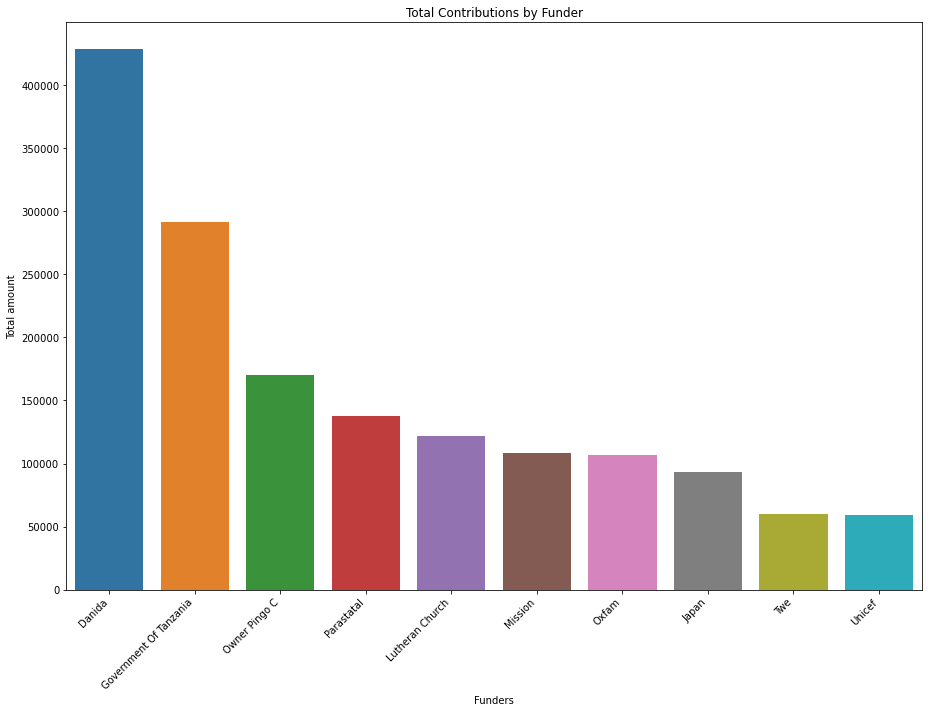

In [358]:
plt.figure(figsize=(13,10))
sns.barplot(data=funder_totals.sort_values("amount_tsh",ascending= False).head(10),
            x="funder",
            y="amount_tsh")
plt.title("Total Contributions by Funder")
plt.ylabel("Total amount")
plt.xlabel("Funders")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above cell shows the top ten Funders to the contribution of water in Tanzania with Danida and the Government of Tanzania being the highest contributors.

In [359]:
quality_totals = df.groupby("quality_group",as_index = False)["amount_tsh"].sum()
quality_totals

,quality_group,amount_tsh
0,colored,15280.0
1,fluoride,39000.0
2,good,2605922.0
3,milky,10.0
4,salty,78760.0
5,unknown,21460.0


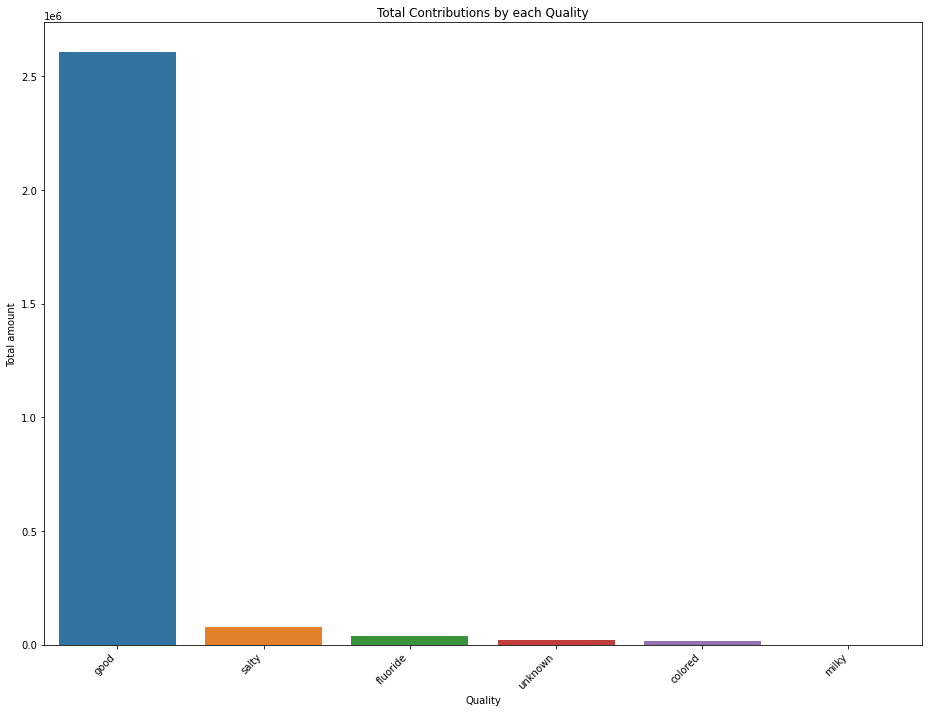

In [360]:
plt.figure(figsize=(13,10))
sns.barplot(data=quality_totals.sort_values("amount_tsh",ascending= False).head(10),
            x="quality_group",
            y="amount_tsh")
plt.title("Total Contributions by each Quality")
plt.ylabel("Total amount")
plt.xlabel("Quality")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most of the contributions went towards 'good' quality due to it having many uses compared to the others.

In [361]:
quantity_totals = df.groupby("quantity_group",as_index = False)["amount_tsh"].sum()
quantity_totals

,quantity_group,amount_tsh
0,dry,119600.0
1,enough,2163235.0
2,insufficient,435647.0
3,seasonal,39490.0
4,unknown,2460.0


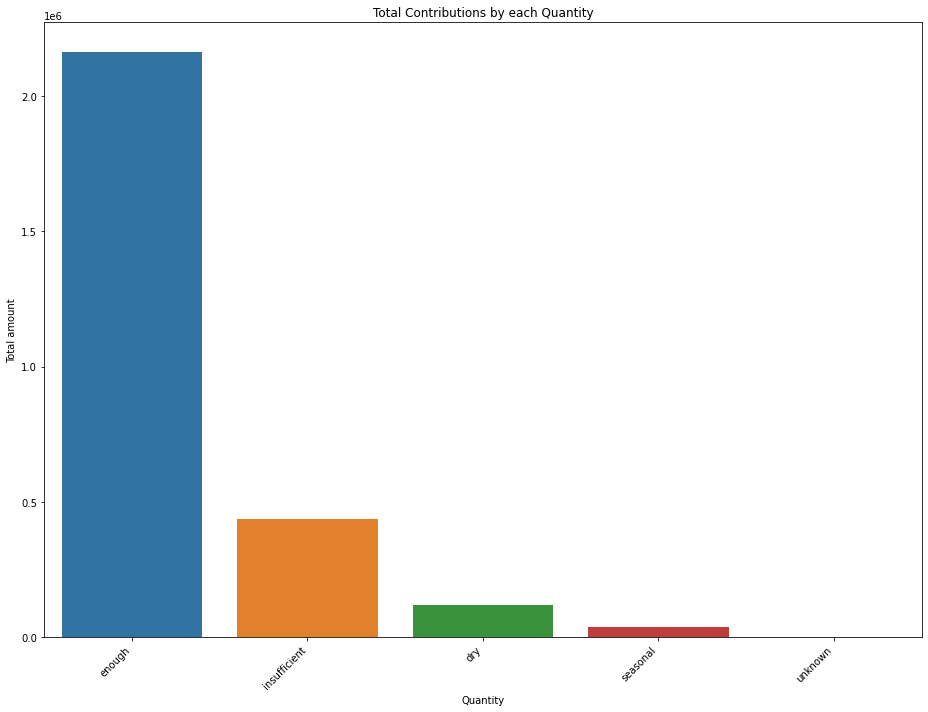

In [362]:
plt.figure(figsize=(13,10))
sns.barplot(data=quantity_totals.sort_values("amount_tsh",ascending= False).head(10),
            x="quantity_group",
            y="amount_tsh")
plt.title("Total Contributions by each Quantity")
plt.ylabel("Total amount")
plt.xlabel("Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most of the contributions were well invested in "enough" quantity.

In [370]:
df['year'] = df['date_recorded'].dt.year

<ipython-input-370-d2d186d7b714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_recorded'].dt.year


<ipython-input-388-68b2e0689870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_recorded'].dt.year


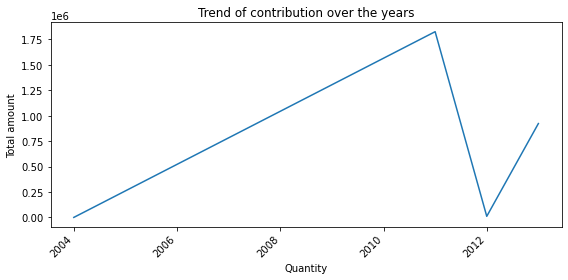

In [388]:
df['year'] = df['date_recorded'].dt.year
plt.figure(figsize=(8,4))
sns.lineplot(data=df,
            x="year",
            y="amount_tsh",
            estimator="sum",
            ci=None)
plt.title("Trend of contribution over the years")
plt.ylabel("Total amount")
plt.xlabel("Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There is a noticable rise of contribution from 2004 to 2011. A sharp decline in 2012 can be due to incomplete data or real reduction in funding.

In [379]:
water_source_quality = (
    df.groupby(['source_class','quality_group'])
    .size()
    .reset_index(name='count')
    .sort_values('count',ascending=False)
)
water_source_quality.head()

,source_class,quality_group,count
2,groundwater,good,3417
8,surface,good,1777
4,groundwater,salty,224
5,groundwater,unknown,69
1,groundwater,fluoride,33


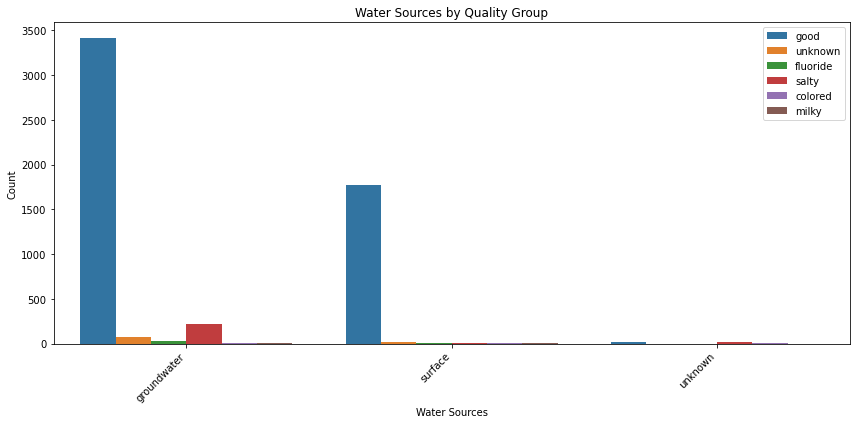

In [389]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='source_class',
    hue='quality_group'
)
plt.xticks(rotation=45,ha='right')
plt.title("Water Sources by Quality Group")
plt.xlabel("Water Sources")
plt.ylabel("Count")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Good quality of water is mostly found in ground water sources compared to surface sources.

In [381]:
water_source_quantity = (
    df.groupby(['source_class','quantity_group'])
    .size()
    .reset_index(name='count')
    .sort_values('count',ascending=False)
)
water_source_quantity.head()

,source_class,quantity_group,count
1,groundwater,enough,2226
6,surface,enough,1127
2,groundwater,insufficient,1016
0,groundwater,dry,421
7,surface,insufficient,417


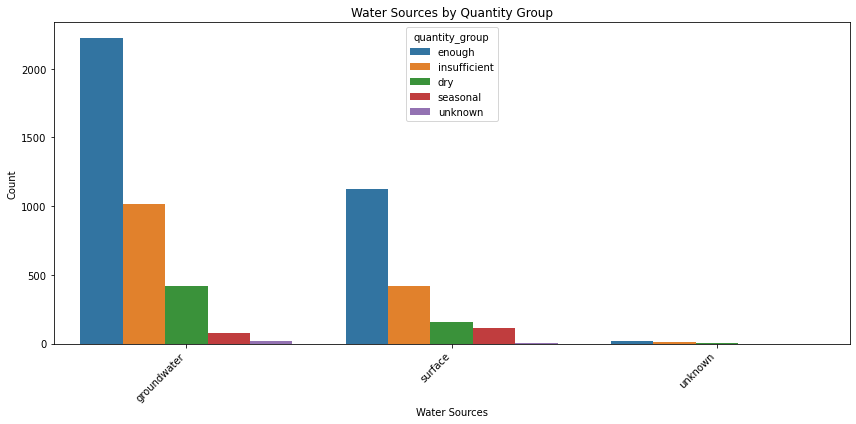

In [382]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='source_class',
    hue='quantity_group'
)
plt.xticks(rotation=45,ha='right')
plt.title("Water Sources by Quantity Group")
plt.xlabel("Water Sources")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Most of enough water also comes from groundwater sources but also does insufficient water. It seems from the graph that Tanzania mostly focuses on underground sources compared to surface sources.

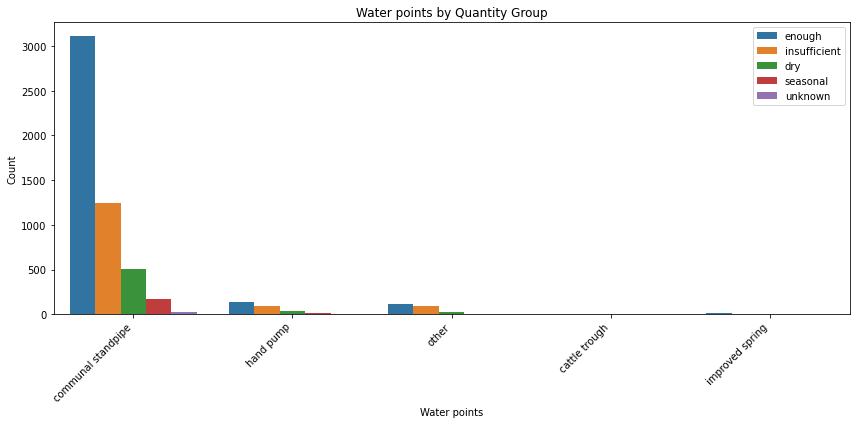

In [387]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='waterpoint_type_group',
    hue='quantity_group'
)
plt.xticks(rotation=45,ha='right')
plt.title("Water points by Quantity Group")
plt.xlabel("Water points")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Communal standpipes are the most efficient and effective compared the other water points.